In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys; sys.path.append('..')

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from src.data_utils import get_dataset_imagenet, imagenet_classes
from plot_utils import stacksimple
from jupyter_preproc import smoothen

import os
from os.path import join

rng = np.random.default_rng(5)

In [17]:
gname = 'resnet50'
dname = 'imagenet_val'

dataset = get_dataset_imagenet(dname)
ytest = dataset.targets
classes = imagenet_classes

G = np.load(f'../processed/imagenet/{gname}/{gname}_{dname}.npz', mmap_mode='r')
NUM_SAMPLES, NUM_CLASSES, NUM_CHECKPOINTS = G['probs'].shape

print(list(G.keys()))
print(G['probs'].shape)

['x', 'all_acc', 'x_err', 'all_acc_err', 'points', 'points_err', 'labels', 'labels_err', 'probs', 'freqs']
(50000, 1000, 40)


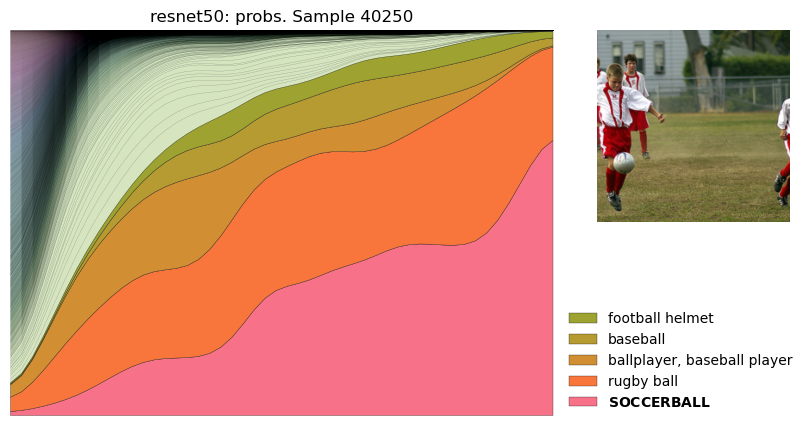

In [42]:
## parameters
t = 'probs'
smooth = True
num_gridpts = 50 # num pts on x-axis
sigma = 2.0

## generate plot
xkey = 'x'

## random plot
i = rng.choice(range(NUM_SAMPLES)) # random image index
sns.reset_defaults()
mpl.rcParams['font.family'] = 'sans-serif'

res = smoothen(G, xkey, t, i)

xx = res[f'{xkey}_grid']
yy = res[f'{t}_smooth']
    
f = stacksimple(i, xx, yy, dataset, classes) # the actual plot
f.axes[0].set_title(f'{gname}: {t}. Sample {i}');

In [43]:
scores = np.load(f'../scores/imagenet/{gname}/{gname}_{dname}_scores.npz', mmap_mode='r')
print(list(scores.keys()))

['ent_nonmono', 'ent_thresh', 'ent_easy', 'acc_nonmono', 'acc_thresh', 'acc_easy']


[20.66568663 17.44128102 17.34964849 ... -0.36091636 -0.36091636
 -0.36091636]


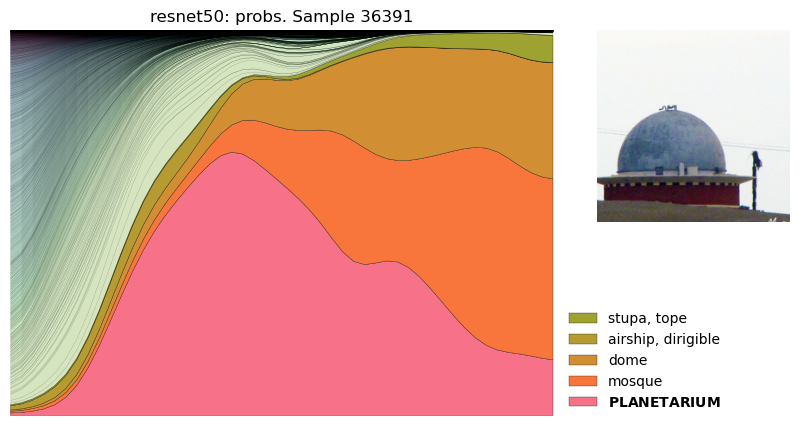

In [44]:
S = scores['acc_nonmono']
ind = np.argsort(-S)
print(S[ind])

i = ind[0]

res = smoothen(G, xkey, t, i)

xx = res[f'{xkey}_grid']
yy = res[f'{t}_smooth']
    
f = stacksimple(i, xx, yy, dataset, classes) # the actual plot
f.axes[0].set_title(f'{gname}: {t}. Sample {i}');


[3.37575357e-05 6.52659151e-05 1.03814697e-04 ... 4.69719293e-01
 4.74689008e-01 4.92888629e-01]
